# Airline arrivals
## Objective:
Predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

## Dataset:
http://stat-computing.org/dataexpo/2009/the-data.html

### Other approaches:
https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# use to read in multiple csvs
import glob

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import 
%matplotlib inline

In [2]:
# Read in the CSV files 2005, 2006, 2007, 2008
# This was slow, start with just 2008
#df = pd.concat([pd.read_csv(f) for f in glob.glob('airline_info/200*.csv')])

df = pd.read_csv('airline_info/2008.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [5]:
df['is_delay'] = np.where(df['ArrDelay'] > 30, 1, 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
is_delay             int64
dtypes: float64(14), int64(11), object(5)
me

In [7]:
features = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 
           'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']

In [8]:
df_new = df[df['is_delay']==True][features]

In [9]:
df_new.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiIn,TaxiOut,DepDelay,ArrDelay
4,2.0,0.0,0.0,0.0,32.0,3.0,10.0,34.0,34.0
6,10.0,0.0,0.0,0.0,47.0,3.0,7.0,67.0,57.0
11,8.0,0.0,0.0,0.0,72.0,6.0,8.0,94.0,80.0
19,12.0,0.0,0.0,0.0,25.0,2.0,5.0,51.0,37.0
26,40.0,0.0,0.0,0.0,7.0,6.0,6.0,87.0,47.0


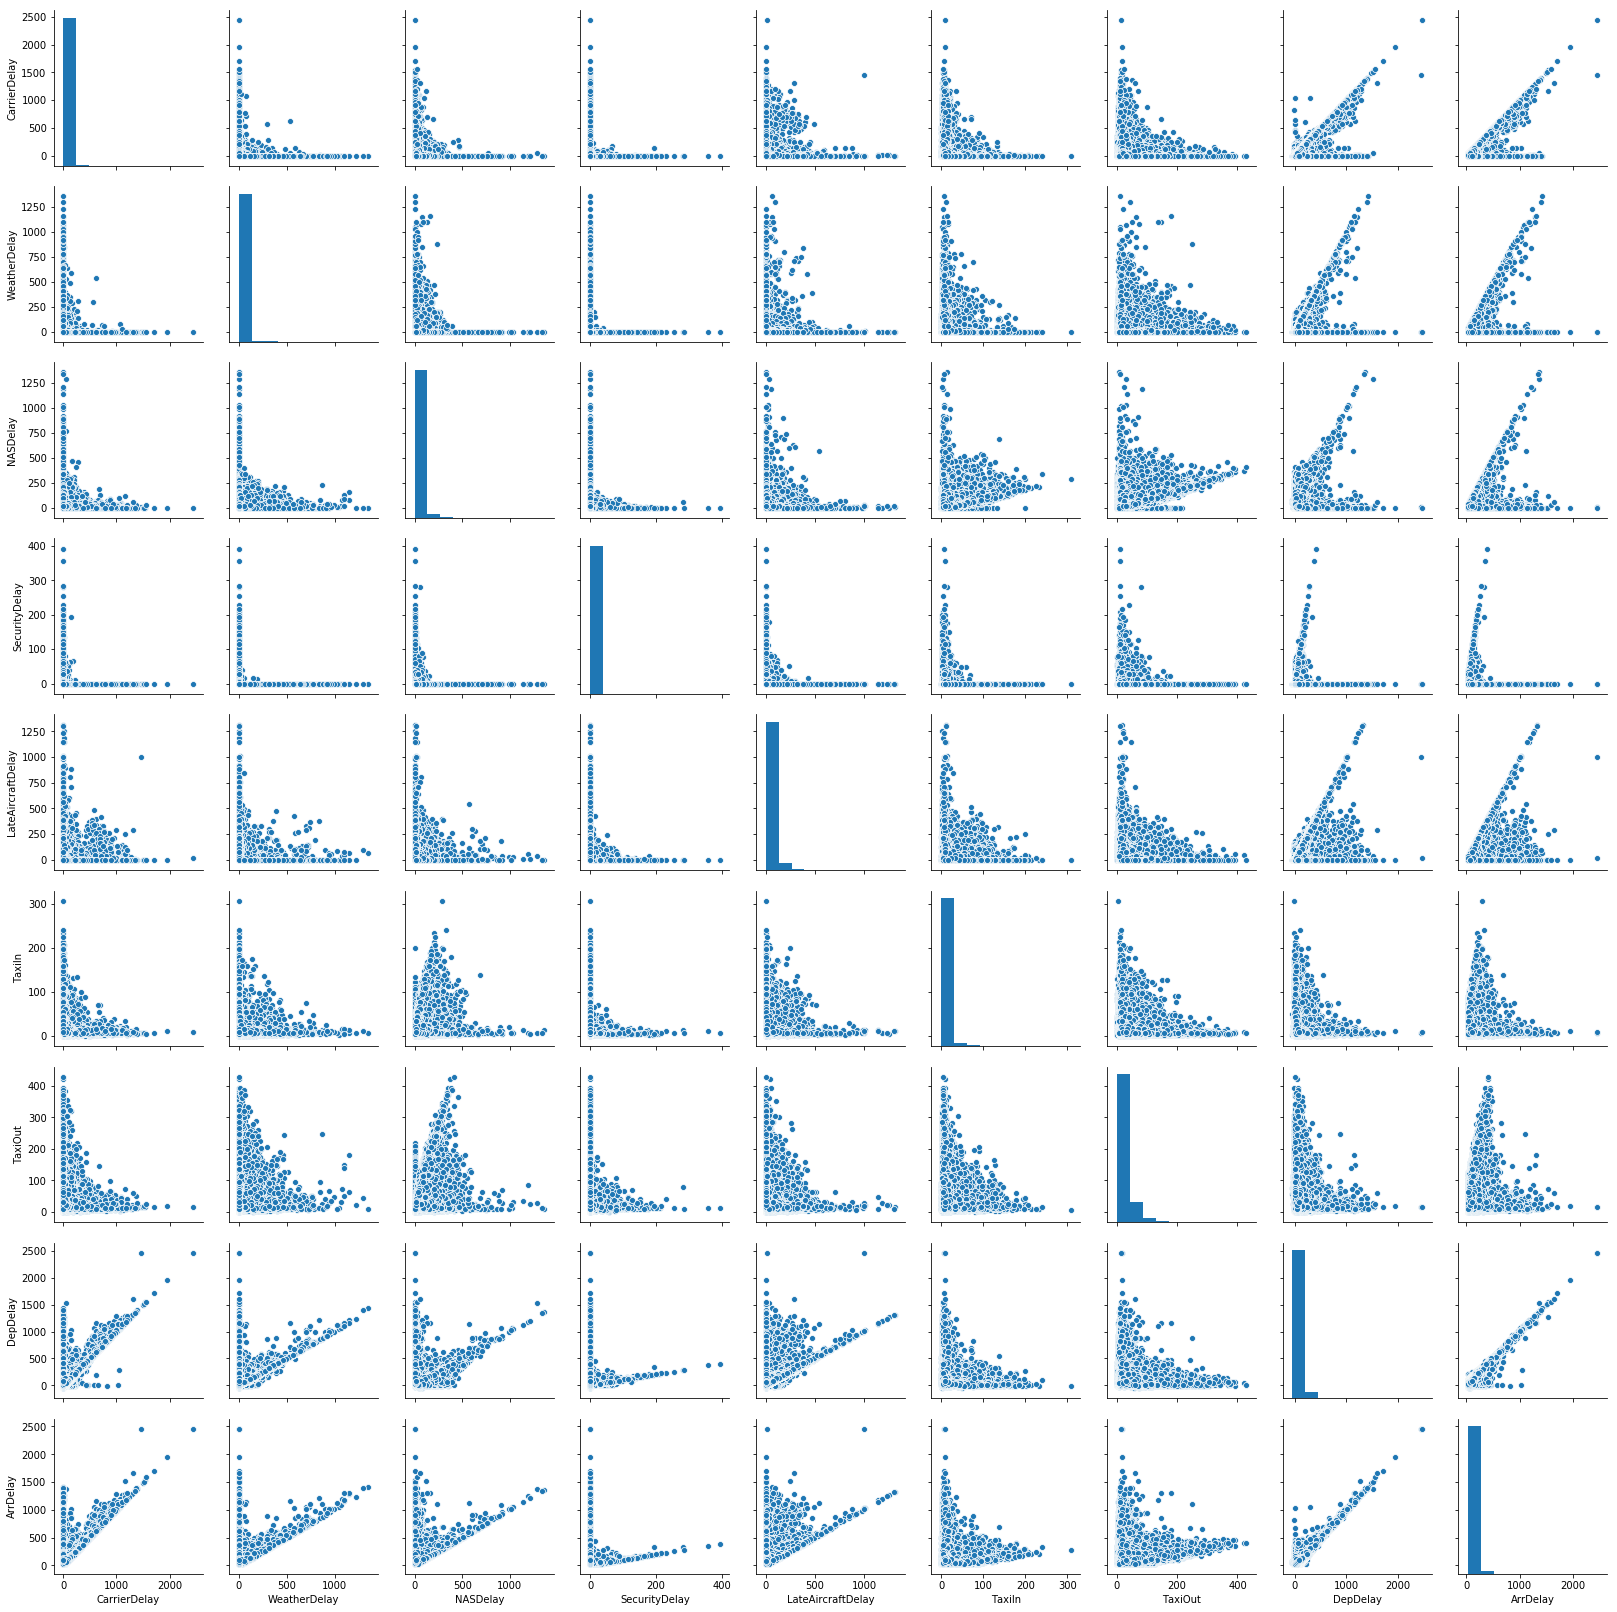

In [10]:
sns.pairplot(df_new)

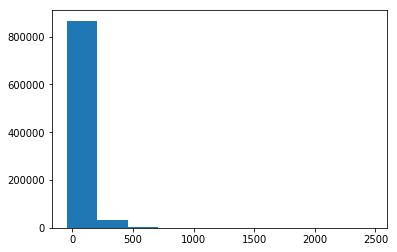

In [11]:
plt.hist(df_new['DepDelay'])
plt.show()

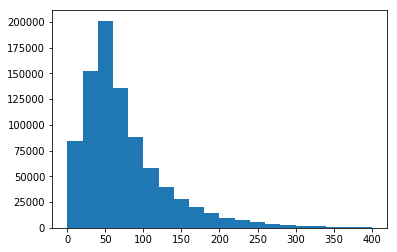

In [12]:
plt.hist(df_new['DepDelay'], range=(0, 400), bins=20)
plt.show()

In [13]:
df_new.describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiIn,TaxiOut,DepDelay,ArrDelay
count,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000,901398.000000
mean,22.743994,4.816709,22.517477,0.080223,31.193481,7.983719,24.864568,71.999945,81.351885
std,50.511957,25.095842,39.852576,2.222620,47.842947,7.671975,22.080898,66.489399,63.569957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.000000,31.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,12.000000,34.000000,42.000000
50%,0.000000,0.000000,5.000000,0.000000,6.000000,6.000000,17.000000,56.000000,61.000000
75%,30.000000,0.000000,32.000000,0.000000,47.000000,9.000000,29.000000,93.000000,98.000000
max,2436.000000,1352.000000,1357.000000,392.000000,1316.000000,308.000000,429.000000,2467.000000,2461.000000


Departure delay is highly correlated with other variables.  This may need to be left out of the model because it violates the assumptions of low multicollinearity.

In [14]:
X = df_new.drop(['ArrDelay', 'DepDelay'], axis=1)
y = df_new['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)

print('Training R2 score: {:.6f}'.format(regr.score(X_train, y_train)))
print('Testing R2 score: {:.6f}'.format(regr.score(X_test, y_test)))



Training R2 score: 1.000000
Testing R2 score: 1.000000


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [15]:
X.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiIn,TaxiOut
4,2.0,0.0,0.0,0.0,32.0,3.0,10.0
6,10.0,0.0,0.0,0.0,47.0,3.0,7.0
11,8.0,0.0,0.0,0.0,72.0,6.0,8.0
19,12.0,0.0,0.0,0.0,25.0,2.0,5.0
26,40.0,0.0,0.0,0.0,7.0,6.0,6.0


### ArrDelay must be perfectly related to these parameters.  Let's try using different ones

In [16]:
features2 = ['Origin', 'DayOfWeek', 'Dest', 'UniqueCarrier', 'DepTime', 'FlightNum', 'ArrDelay']
df_new2 = df[df['is_delay']==True][features2]

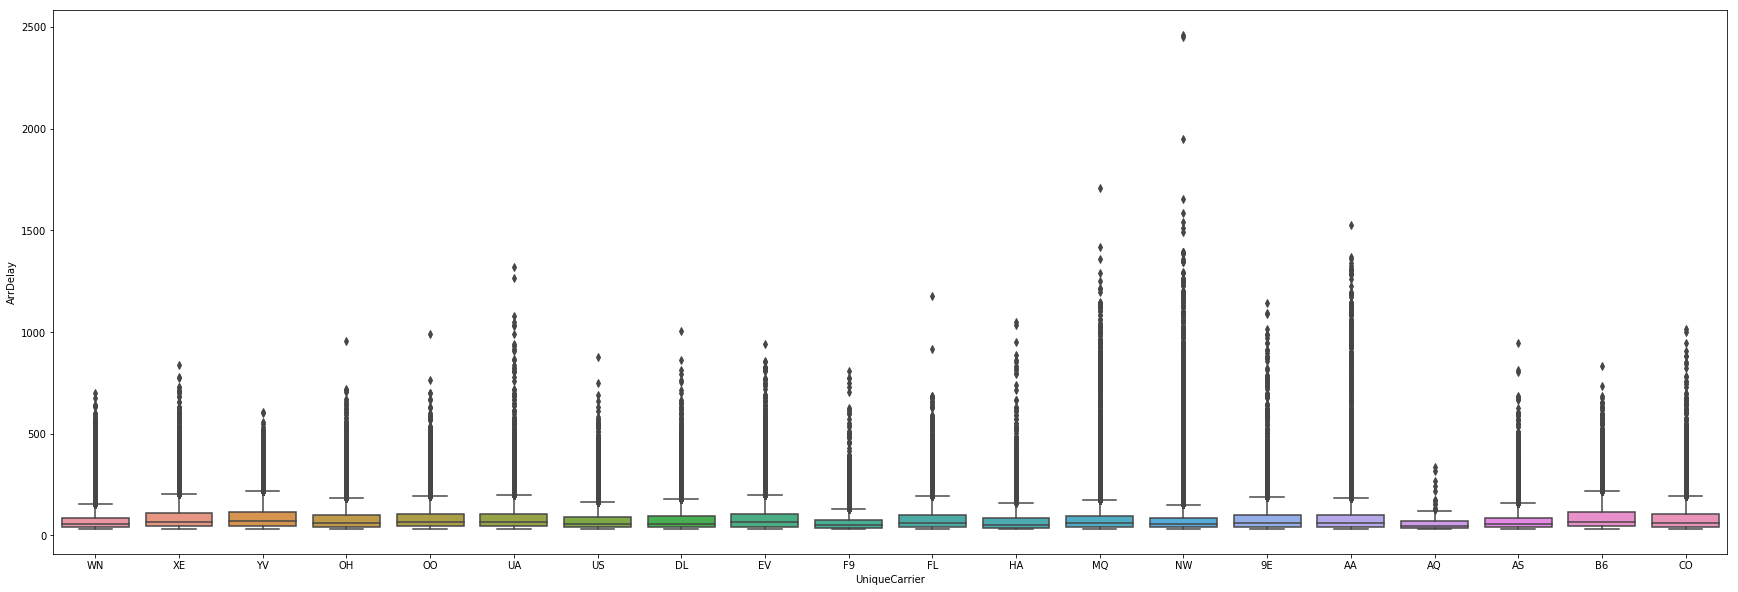

In [17]:
plt.figure(figsize=(30,10))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df_new2)

In [18]:
top10 = df_new2.Origin.value_counts()[:10]

In [19]:
df_new2.UniqueCarrier.value_counts()

WN    123840
AA    100571
UA     73860
MQ     71675
OO     63840
XE     55102
DL     52391
US     44706
CO     44594
EV     41029
NW     40830
YV     37522
FL     33238
B6     32286
OH     31384
9E     27083
AS     16017
F9      8797
HA      2463
AQ       170
Name: UniqueCarrier, dtype: int64

In [20]:
top10 = df_new2[['Origin', 'ArrDelay', 'DayOfWeek']]

In [21]:
top10b = df_new2.groupby('Origin').agg({'ArrDelay': 'mean', 'DayOfWeek': lambda x:x.value_counts().index[0], 'Dest': 'count'})

In [22]:
top10b.sort_values(by='Dest', ascending=False, axis=0).head(15)

,ArrDelay,DayOfWeek,Dest
Origin,,,
ORD,84.433852,5,70312
ATL,77.611374,5,59749
DFW,73.455963,2,41567
DEN,73.393900,7,31178
EWR,85.080920,4,29869
DTW,74.656665,5,23595
IAH,79.349224,4,23054
JFK,87.583117,5,22745
SFO,81.620284,1,22077


In [23]:
top10b.sort_values(by='ArrDelay', ascending=False, axis=0).head(15)

,ArrDelay,DayOfWeek,Dest
Origin,,,
ACY,210.777778,5,9
CMX,170.166667,7,24
MOT,161.816667,7,60
ALO,135.055556,5,18
PLN,131.600000,4,15
ABI,124.442708,2,192
PIR,118.000000,1,1
EGE,116.064286,6,560
LCH,115.734043,5,94


In [24]:
# 1 is Monday, 7 is Sunday, Fridays appear to be the worst day to fly
df_new2.groupby(by='DayOfWeek').count()['ArrDelay'].sort_values(ascending=False)

DayOfWeek
5    156254
7    134765
1    133241
4    132714
2    126602
3    120555
6     97267
Name: ArrDelay, dtype: int64

In [25]:
df.groupby(by='DayOfWeek').count()['ArrDelay'].sort_values(ascending=False)

DayOfWeek
3    1016995
1    1013410
4    1011970
5    1008872
2    1005992
7     956127
6     841663
Name: ArrDelay, dtype: int64

In [26]:
df_new2['is_Friday'] = np.where(df_new2['DayOfWeek'] == 5, 1, 0)
df_new2['is_Wednesday'] = np.where(df_new2['DayOfWeek'] == 3, 1, 0)



In [27]:
df_new2.groupby(by='UniqueCarrier').mean()['ArrDelay'].sort_values(ascending=False)

UniqueCarrier
B6    92.113610
YV    89.576462
XE    87.362891
UA    85.473680
EV    85.078774
CO    84.560972
HA    84.354040
OO    83.098246
FL    82.912931
9E    82.326146
AA    81.832656
OH    81.358527
MQ    80.522902
DL    79.007234
NW    77.815356
AS    75.339077
US    75.037199
WN    73.313889
F9    66.583722
AQ    64.670588
Name: ArrDelay, dtype: float64

In [28]:
df_new2_carriers = pd.get_dummies(df_new2[['UniqueCarrier', 'Origin','Dest']], 
                                  drop_first=True)
df_new2_carriers.head()

,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_new3 = df_new2.join(df_new2_carriers)
df_new3.drop(['Origin', 'Dest', 'UniqueCarrier'], axis=1, inplace=True)
df_new3.head()

,DayOfWeek,DepTime,FlightNum,ArrDelay,is_Friday,is_Wednesday,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
4,4,1829.0,3920,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,1937.0,509,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,4,1644.0,1333,80.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,4,1416.0,54,37.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,4,1422.0,188,47.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
tree_rgr = DecisionTreeRegressor()

In [31]:
X3 = df_new3.drop('ArrDelay', axis=1)
y3 = df_new3['ArrDelay']

In [32]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)

In [33]:
tree_rgr.fit(X3_train, y3_train)
tree_rgr.score(X3_test, y3_test)

-0.05141385373583707

In [34]:
X3_new = SelectKBest(f_regression, k=20).fit_transform(X3, y3)

In [35]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_new, y3, test_size=0.3)
regr3 = LinearRegression()
regr3.fit(X3_train, y3_train)
regr3.score(X3_test, y3_test)

0.020447883814281087

## Try with a random forest classifier and label encode

In [36]:
features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']

In [66]:
# Read in the CSV files 2005, 2006, 2007, 2008
# This was slow, start with just 2008
# Reading in CSV again to make sure I know what is the status of the df
# for this model
df = pd.read_csv('airline_info/2008.csv')

le = LabelEncoder()
df['UniqueCarrier'] = le.fit_transform(df['UniqueCarrier'])
df['Origin'] = le.fit_transform(df['Origin'])
df['Dest'] = le.fit_transform(df['Dest'])


df['is_delay'] = np.where(df['ArrDelay'] > 30, 1, 0)

df['ArrDelay30'] = [x - 30 for x in df['ArrDelay']]

df_arr = df[(df['Cancelled'] == 0) & (df['is_delay'] == 1)]



In [67]:
# Let's do a forest

X = df_arr[features]
y = df_arr['ArrDelay30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.09152936691958535

Feature ranking:
1. feature 2 (0.180676)
2. feature 5 (0.158147)
3. feature 4 (0.143955)
4. feature 9 (0.118979)
5. feature 3 (0.091911)
6. feature 7 (0.090045)
7. feature 1 (0.085018)
8. feature 8 (0.082629)
9. feature 6 (0.048642)
10. feature 0 (0.000000)


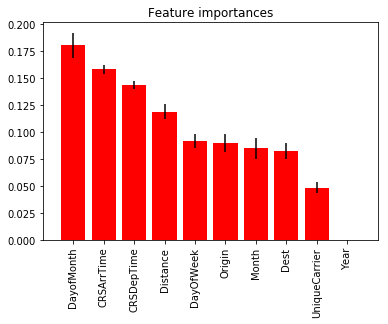

In [70]:
# Plot forest feature importances
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

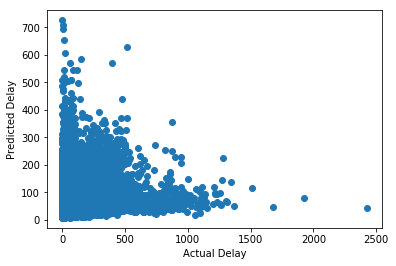

In [72]:
y_pred = forest.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.show()

In [73]:
from lightgbm import LGBMModel

df2008 = pd.read_csv('airline_info/2008.csv')
df2007 = pd.read_csv('airline_info/2007.csv')
df2006 = pd.read_csv('airline_info/2006.csv')

df = pd.concat([df2008, df2007, df2006])


le = LabelEncoder()
df['UniqueCarrier'] = le.fit_transform(df['UniqueCarrier'])
df['Origin'] = le.fit_transform(df['Origin'])
df['Dest'] = le.fit_transform(df['Dest'])


df['is_delay'] = np.where(df['ArrDelay'] > 30, 1, 0)

df['ArrDelay30'] = [x - 30 for x in df['ArrDelay']]

df_arr = df[(df['Cancelled'] == 0) & (df['is_delay'] == 1)]

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [86]:
from sklearn.metrics import precision_score
from lightgbm.sklearn import LGBMRegressor

X = df_arr[features]
y = df_arr['ArrDelay30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lgbm = LGBMRegressor()
lgbm.fit(X=X_train, y=y_train)
y_pred = lgbm.predict(X_test)

Feature ranking:
1. feature 2 (507.000000)
2. feature 1 (428.000000)
3. feature 6 (386.000000)
4. feature 7 (372.000000)
5. feature 8 (278.000000)
6. feature 4 (250.000000)
7. feature 3 (248.000000)
8. feature 0 (197.000000)
9. feature 9 (179.000000)
10. feature 5 (155.000000)


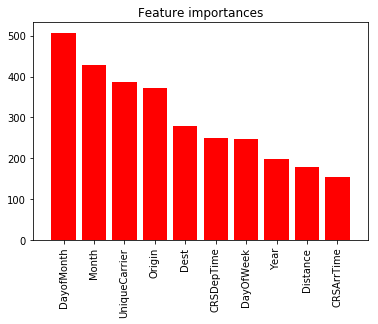

In [89]:
importances = lgbm.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.052278659220749146